<a href="https://colab.research.google.com/github/faiz-224/Python/blob/main/Copy_of_Agentic_AI_Python_Lesson_16B_Advance_Asyncio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#a9a56c" size=2> **@Author: Arif Kasim Rozani - (Team Operation Badar)** </font>




---

# **Benefits of Using `asyncio` Over `threading` in Agentic AI**

In **Agentic AI** systems, where multiple autonomous agents interact, communicate, and execute tasks dynamically, efficient concurrency management is crucial. **`asyncio` is a superior choice over `threading`** in such scenarios due to its **low overhead, cooperative multitasking, and better scalability**.


## **1️⃣ Why `asyncio` is Better than `threading` in Agentic AI**

| Feature             | asyncio (Async/Await)                 | threading (Multithreading)                     |   |
|---------------------|---------------------------------------|------------------------------------------------|---|
| GIL Limitations     | ✅ Bypasses GIL for I/O-bound tasks    | ❌ GIL restricts true parallel execution        |   |
| Resource Efficiency | ✅ Low memory & CPU overhead           | ❌ Higher resource consumption                  |   |
| Scalability         | ✅ Handles 1000s of agents efficiently | ❌ Limited by OS thread count                   |   |
| Task Switching      | ✅ Cooperative & efficient             | ❌ Preemptive & high overhead                   |   |
| Error Handling      | ✅ Structured (async exceptions)       | ❌ Difficult (race conditions, deadlocks)       |   |
| Performance         | ✅ Better for I/O-heavy AI workflows   | ❌ Context switching slows down CPU-bound tasks |   |


## **2️⃣ How `asyncio` Benefits Agentic AI**

### 🔹 **1. Efficient Concurrency for Multiple Agents**

-   Agentic AI often involves **autonomous agents performing tasks concurrently** (e.g., web scraping, API requests, database queries, LLM calls).
-   `asyncio` **uses a single event loop**, meaning it can **handle thousands of tasks without creating multiple OS threads**.

💡 **Example: Parallel API Calls with `asyncio` in Agentic AI**

In [ ]:
!pip -q install httpx h

In [ ]:
import asyncio
import httpx

async def fetch_data(agent_name, url):
    async with httpx.AsyncClient() as client:
        response = await client.get(url)
        print(f"{agent_name} received response: {response.status_code}")

async def main():
    agents = [
        fetch_data("Agent_1", "https://www.google.com/"),
        fetch_data("Agent_2", "https://www.openai.com/"),
        fetch_data("Agent_3", "https://www.facebook.com/"),
    ]
    await asyncio.gather(*agents)
await main()

Agent_1 received response: 200
Agent_2 received response: 403
Agent_3 received response: 200


✅ **Benefits:**

-   Handles **multiple I/O operations simultaneously** without blocking.
-   More efficient than using multiple threads.

### 🔹 **2. Low Overhead & Resource Efficiency**

-   `threading` spawns multiple **OS-level threads**, which are **heavy on CPU and memory**.
-   `asyncio` **does not require multiple threads**, reducing **memory footprint and CPU load**.

💡 **Example: Why `asyncio` Scales Better**

In [ ]:
import asyncio

async def task(n):
    await asyncio.sleep(n)
    print(f"Task {n} done")

async def main():
    #await asyncio.gather(*(task(i) for i in range(1000)))  # Handles 1000 tasks efficiently
    await asyncio.gather(*(task(i) for i in range(50)))  # Handles 50 tasks efficiently

await main()


Task 0 done
Task 1 done
Task 2 done
Task 3 done
Task 4 done
Task 5 done
Task 6 done
Task 7 done
Task 8 done
Task 9 done
Task 10 done
Task 11 done
Task 12 done
Task 13 done
Task 14 done
Task 15 done
Task 16 done
Task 17 done
Task 18 done
Task 19 done
Task 20 done
Task 21 done
Task 22 done
Task 23 done
Task 24 done
Task 25 done
Task 26 done
Task 27 done
Task 28 done
Task 29 done
Task 30 done
Task 31 done
Task 32 done
Task 33 done
Task 34 done
Task 35 done
Task 36 done
Task 37 done
Task 38 done
Task 39 done
Task 40 done
Task 41 done
Task 42 done
Task 43 done
Task 44 done
Task 45 done
Task 46 done
Task 47 done
Task 48 done
Task 49 done


✅ **Scales effortlessly** → Handling 1000+ agents with **minimal CPU/memory impact**.  
❌ `threading` would struggle with this due to **high context-switching overhead**.

### 🔹 **3. Ideal for LLM Orchestration & API Calls**

-   Agentic AI often integrates **LLMs (OpenAI, Claude, Gemini, etc.)**.
-   Calling multiple LLM APIs using `threading` **wastes CPU cycles**, while `asyncio` allows **non-blocking execution**.

💡 **Example: Parallel LLM Queries with `asyncio`**

In [ ]:
!pip install -q litellm
!pip install -q -U google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.4/567.4 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 5.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.24.0 requires anyio<4,>=3.1.0, but you have anyio 4.9.0 which is incompatible.


In [ ]:
import asyncio
import openai  # Example, replace with actual API calls
from litellm import completion
from google.colab import userdata
from google import genai

async def query_llm(agent_name, prompt):

    client = genai.Client(api_key=userdata.get('GEMINI_API_KEY'))
    response = client.models.generate_content(
    model="gemini-2.0-flash", contents=prompt)

    print(f"{agent_name} received response: {response.text}")

async def main():
    agents = [
        query_llm("Agent_1", "Explain quantum computing in 50 words"),
        query_llm("Agent_2", "Summarize AI ethics in 50 words"),
        query_llm("Agent_3", "Translate this text"),
    ]
    await asyncio.gather(*agents)

    print("main method ends...")

await main()


Agent_1 received response: Quantum computing harnesses the weirdness of quantum mechanics, like superposition and entanglement, to solve complex problems beyond the reach of classical computers.  Instead of bits (0 or 1), it uses qubits, which can be 0, 1, or both simultaneously, allowing for exponentially faster calculations for specific tasks like drug discovery and materials science.

Agent_2 received response: AI ethics explores moral principles for AI development and deployment. It addresses fairness, accountability, transparency, and safety to prevent bias, discrimination, and harm, ensuring AI benefits humanity responsibly.

Agent_3 received response: Please provide the text you would like me to translate. I need the text to be able to translate it for you.

main method ends...


✅ **Improves throughput** by handling multiple LLM requests **concurrently**.  
✅ **No wasted CPU cycles**—`asyncio` **waits** efficiently for responses.


### 🔹 **4. Better Error Handling & Debugging**

-   **`asyncio` exceptions are structured and predictable**.
-   `threading` leads to **hard-to-debug race conditions & deadlocks**.

💡 **Example: Handling Errors Gracefully**

In [ ]:
import asyncio

async def faulty_agent():
    try:
        await asyncio.sleep(2)
        raise ValueError("Something went wrong!")
    except Exception as e:
        print(f"Handled error: {e}")

async def main():
    await faulty_agent()

await main()


Handled error: Something went wrong!



✅ **Prevents crashes**, unlike `threading`, where errors can **terminate the entire process**.

### 🔹 **5. Compatible with `multiprocessing` for Hybrid Use Cases**

-   **If CPU-bound tasks are required** (e.g., ML training, number crunching), combine **`asyncio` for I/O tasks** and **`multiprocessing` for CPU-heavy tasks**.

💡 **Example: Hybrid Approach**

In [ ]:
import asyncio
import multiprocessing

async def async_task():
    print("Async task running")
    await asyncio.sleep(5)

def cpu_task():
    print("CPU-intensive task running")

async def main():
    process = multiprocessing.Process(target=cpu_task)
    process.start()
    print("process.is_alive() = ", process.is_alive())# alive=True, after start

    await async_task()
    process.join()
    print("process.is_alive() = ", process.is_alive())

#asyncio.run(main())
await main()


CPU-intensive task running
process.is_alive() =  True
Async task running
process.is_alive() =  False


✅ **Parallelizes CPU and I/O tasks effectively**.


## **🚀  Why `asyncio` Over `threading` in Agentic AI?**

✅ **More scalable** – Handles thousands of agents efficiently.  
✅ **Non-blocking execution** – Ideal for API calls, LLM queries, DB queries.  
✅ **Low CPU & memory usage** – No unnecessary context switching.  
✅ **Better error handling** – Avoids race conditions & deadlocks.  
✅ **Integrates well with multiprocessing** – Can handle hybrid AI workloads.

**🔹 Verdict:** In Agentic AI, where multiple agents need to execute **I/O-heavy** tasks concurrently, `asyncio` is vastly **superior to `threading`**.

## **1️⃣ `asyncio.Queue` – Efficient Inter-Agent Communication**

In **Agentic AI**, agents need to **share data** asynchronously. `asyncio.Queue` provides a **thread-safe way** to exchange messages.

💡 **Example: Shopping Agent Queuing Tasks**

In [ ]:
import asyncio

async def producer(queue):
    for item in ["Laptop", "Phone", "Tablet"]:
        await queue.put(item)
        print(f"🔄 Added {item} to queue")
        await asyncio.sleep(3)  # Simulate processing time

async def consumer(queue):
    while True:
        item = await queue.get()
        print(f"✅ Processed: {item}")
        queue.task_done()

async def main():
    queue = asyncio.Queue()
    producer_task = asyncio.create_task(producer(queue))
    consumer_task = asyncio.create_task(consumer(queue))

    await producer_task
    await queue.join()  # Wait until all tasks are processed
    consumer_task.cancel()

#asyncio.run(main())
await main()


🔄 Added Laptop to queue
✅ Processed: Laptop
🔄 Added Phone to queue
✅ Processed: Phone
🔄 Added Tablet to queue
✅ Processed: Tablet


✅ **Best for:** Agentic AI workflows where tasks need **to be queued and processed asynchronously**.

## **2️⃣ `asyncio.Semaphore` – Preventing API Rate Limits**

If agents make **too many API calls at once**, they may hit **rate limits**. `asyncio.Semaphore` **limits concurrency** while keeping tasks async.

💡 **Example: Limiting LLM API Calls**

In [ ]:
import asyncio

semaphore = asyncio.Semaphore(3)  # Allow max 3 tasks at a time

async def fetch_data(agent_id):
    async with semaphore:
        print(f"🚀 Agent {agent_id} is fetching data...")
        await asyncio.sleep(3)
        print(f"✅ Agent {agent_id} finished fetching")

async def main():
    agents = [fetch_data(i) for i in range(10)]
    await asyncio.gather(*agents)

#asyncio.run(main())
await main()


🚀 Agent 0 is fetching data...
🚀 Agent 1 is fetching data...
🚀 Agent 2 is fetching data...
✅ Agent 0 finished fetching
✅ Agent 1 finished fetching
✅ Agent 2 finished fetching
🚀 Agent 3 is fetching data...
🚀 Agent 4 is fetching data...
🚀 Agent 5 is fetching data...
✅ Agent 3 finished fetching
✅ Agent 4 finished fetching
✅ Agent 5 finished fetching
🚀 Agent 6 is fetching data...
🚀 Agent 7 is fetching data...
🚀 Agent 8 is fetching data...
✅ Agent 6 finished fetching
✅ Agent 7 finished fetching
✅ Agent 8 finished fetching
🚀 Agent 9 is fetching data...
✅ Agent 9 finished fetching


✅ **Best for:** **LLM requests, API calls, and database queries** to prevent overload.

## **3️⃣ `asyncio.TaskGroup` – Structured Concurrency (Python 3.11+)**

Instead of using **`asyncio.gather()`**, `TaskGroup` allows better **error handling** and **cancellation support**.

💡 **Example: Using `TaskGroup` for Parallel Agent Execution**

In [ ]:
import asyncio

async def agent_1():
    await asyncio.sleep(2)
    print("🛒 Shopping Agent: Task completed!")

async def agent_2():
    await asyncio.sleep(5)
    print("🔍 Catalog Agent: Task completed!")

async def main():
    async with asyncio.TaskGroup() as tg:
        tg.create_task(agent_1())
        tg.create_task(agent_2())

#asyncio.run(main())
await main()


🛒 Shopping Agent: Task completed!
🔍 Catalog Agent: Task completed!


✅ **Best for:** Running multiple agent tasks **with better error handling**.

## **4️⃣ `asyncio.run_in_executor()` – Running Sync Code in Async Code**

Sometimes, **blocking code (e.g., legacy ML models, CPU-heavy tasks)** slows down async systems. `asyncio.run_in_executor()` lets you **run sync functions in a separate thread/process**.

💡 **Example: Running Blocking Code in Async Environment**

In [ ]:
import asyncio
import time
from concurrent.futures import ThreadPoolExecutor

def blocking_task():
    time.sleep(7)  # Simulates a slow operation
    return "🖥️ Heavy computation done!"

async def main():
    loop = asyncio.get_running_loop()
    with ThreadPoolExecutor() as pool:
        result = await loop.run_in_executor(pool, blocking_task)
        print(result)

#asyncio.run(main())
await main()


🖥️ Heavy computation done!


✅ **Best for:** Integrating **blocking ML models, file processing, or legacy code**.

## **5️⃣ `asyncio.Event` – Synchronizing Agent Actions**

When multiple agents need to **wait for a signal** before executing, `asyncio.Event` helps **synchronize them**.

💡 **Example: Agents Waiting for a Signal**

In [ ]:
import asyncio

event = asyncio.Event()

async def waiting_agent():
    print("🤖 Agent waiting for signal...")
    await event.wait()  # Wait until event is set
    print("✅ Agent received signal and starts processing!")

async def signal_trigger():
    await asyncio.sleep(5)  # Simulate delay
    print("🚦 Sending signal to agents!")
    event.set()  # Unblock waiting agents

async def main():
    await asyncio.gather(waiting_agent(), signal_trigger())

#asyncio.run(main())
await main()


🤖 Agent waiting for signal...
🚦 Sending signal to agents!
✅ Agent received signal and starts processing!


✅ **Best for:** Scenarios where **one agent must wait for another** (e.g., multi-step workflows).

##🔍 – **Extra asyncio Features You Might Have Missed**

| Feature                   | Best For               | Example Use Case                       |   |
|---------------------------|------------------------|----------------------------------------|---|
| asyncio.Queue             | Task Queues            | AI agents sharing tasks                |   |
| asyncio.Semaphore         | Rate limiting          | Preventing API overload                |   |
| asyncio.TaskGroup         | Structured concurrency | Running multiple agents together       |   |
| asyncio.run_in_executor() | Blocking code          | Running CPU-heavy tasks asynchronously |   |
| asyncio.Event             | Agent synchronization  | Triggering multi-step workflows        |   |

# **🚀 Advanced Uses of `asyncio` in Agentic AI**

We've covered a lot about `asyncio`, but there are still **some advanced patterns** that can be incredibly useful for **Agentic AI workflows**. Here are **more powerful `asyncio` techniques** that can further optimize your agents.

## **1️⃣ `asyncio.Streams` – Streaming Real-Time Data**

In **Agentic AI**, an agent may need to **stream results dynamically**, especially for **LLM responses, stock data, or chatbot messages**.

💡 **Example: Streaming LLM Output in Real-Time**

In [ ]:
import asyncio

async def stream_data():
    for i in range(5):
        await asyncio.sleep(1)  # Simulating token generation delay
        yield f"Token {i}..."

async def agent_stream():
    async for token in stream_data():
        print(token, end=" ", flush=True)

#asyncio.run(agent_stream())
await agent_stream()


Token 0... Token 1... Token 2... Token 3... Token 4... 

### **asyncio.Streams**

`asyncio.Streams` is a high-level API provided by Python’s `asyncio` module for working with **asynchronous streams**. It simplifies reading from and writing to streams (e.g., network connections, files, or pipes) in a **non-blocking** way. The primary components of `asyncio.Streams` are:

1.  **`asyncio.StreamReader`**: Used for reading data from a stream.
2.  **`asyncio.StreamWriter`**: Used for writing data to a stream.

These components are typically used together to handle bidirectional communication, such as in TCP servers, HTTP clients, or other network protocols.

### **Key Features**

1.  **Asynchronous I/O**:
    
    -   Read and write operations are non-blocking, allowing the program to perform other tasks while waiting for I/O to complete.
2.  **High-Level API**:
    
    -   Abstracts low-level details of handling sockets, making it easier to work with streams.
3.  **Bidirectional Communication**:
    
    -   Supports both reading and writing on the same stream.
4.  **Built-in Buffering**:
    
    -   Automatically handles buffering for efficient data transfer.


### **Common Use Cases**

-   **TCP/UDP Servers and Clients**: Handle network connections asynchronously.
-   **HTTP Clients**: Stream data from web servers.
-   **Chat Applications**: Real-time messaging between clients.
-   **File I/O**: Asynchronous reading and writing of files.

----------

### **Basic Example: TCP Echo Server**

Here’s a simple example of a TCP echo server using `asyncio.StreamReader` and `asyncio.StreamWriter`:

Open VSCode/Cursor

1.  uv init tcp_echo_server
2.  New file 'server.py'
3.  copy -> paste below code

```python
# server.py

import asyncio

async def handle_client(reader, writer):
    print("Client connected.")
    while True:
        data = await reader.read(100)  # Read up to 100 bytes
        if not data:
            break
        message = data.decode()
        print(f"Received: {message}")
        writer.write(data)  # Echo the data back
        await writer.drain()  # Ensure data is sent
    print("Client disconnected.")
    writer.close()

async def main():
    server = await asyncio.start_server(handle_client, "127.0.0.1", 8888)
    async with server:
        await server.serve_forever()

# Run the server
asyncio.run(main())
```

4.  New file 'client.py'
5.  copy -> paste below code

```python
# client.py

import asyncio

async def tcp_client():
    reader, writer = await asyncio.open_connection("127.0.0.1", 8888)
    print("Connected to server.")

    message = "Hello, Server!"
    print(f"Sending: {message}")
    writer.write(message.encode())
    await writer.drain()

    data = await reader.read(100)
    print(f"Received: {data.decode()}")

    print("Closing connection.")
    writer.close()
    await writer.wait_closed()

# Run the client
asyncio.run(tcp_client())
```

How to run (VSCode):

1.  open terminal
2.  uv run server.py
3.  On right hand side in terminal window right mouse click on terminal icon click on split terminal
4.  It will open another terminal window
5.  uv run client.py

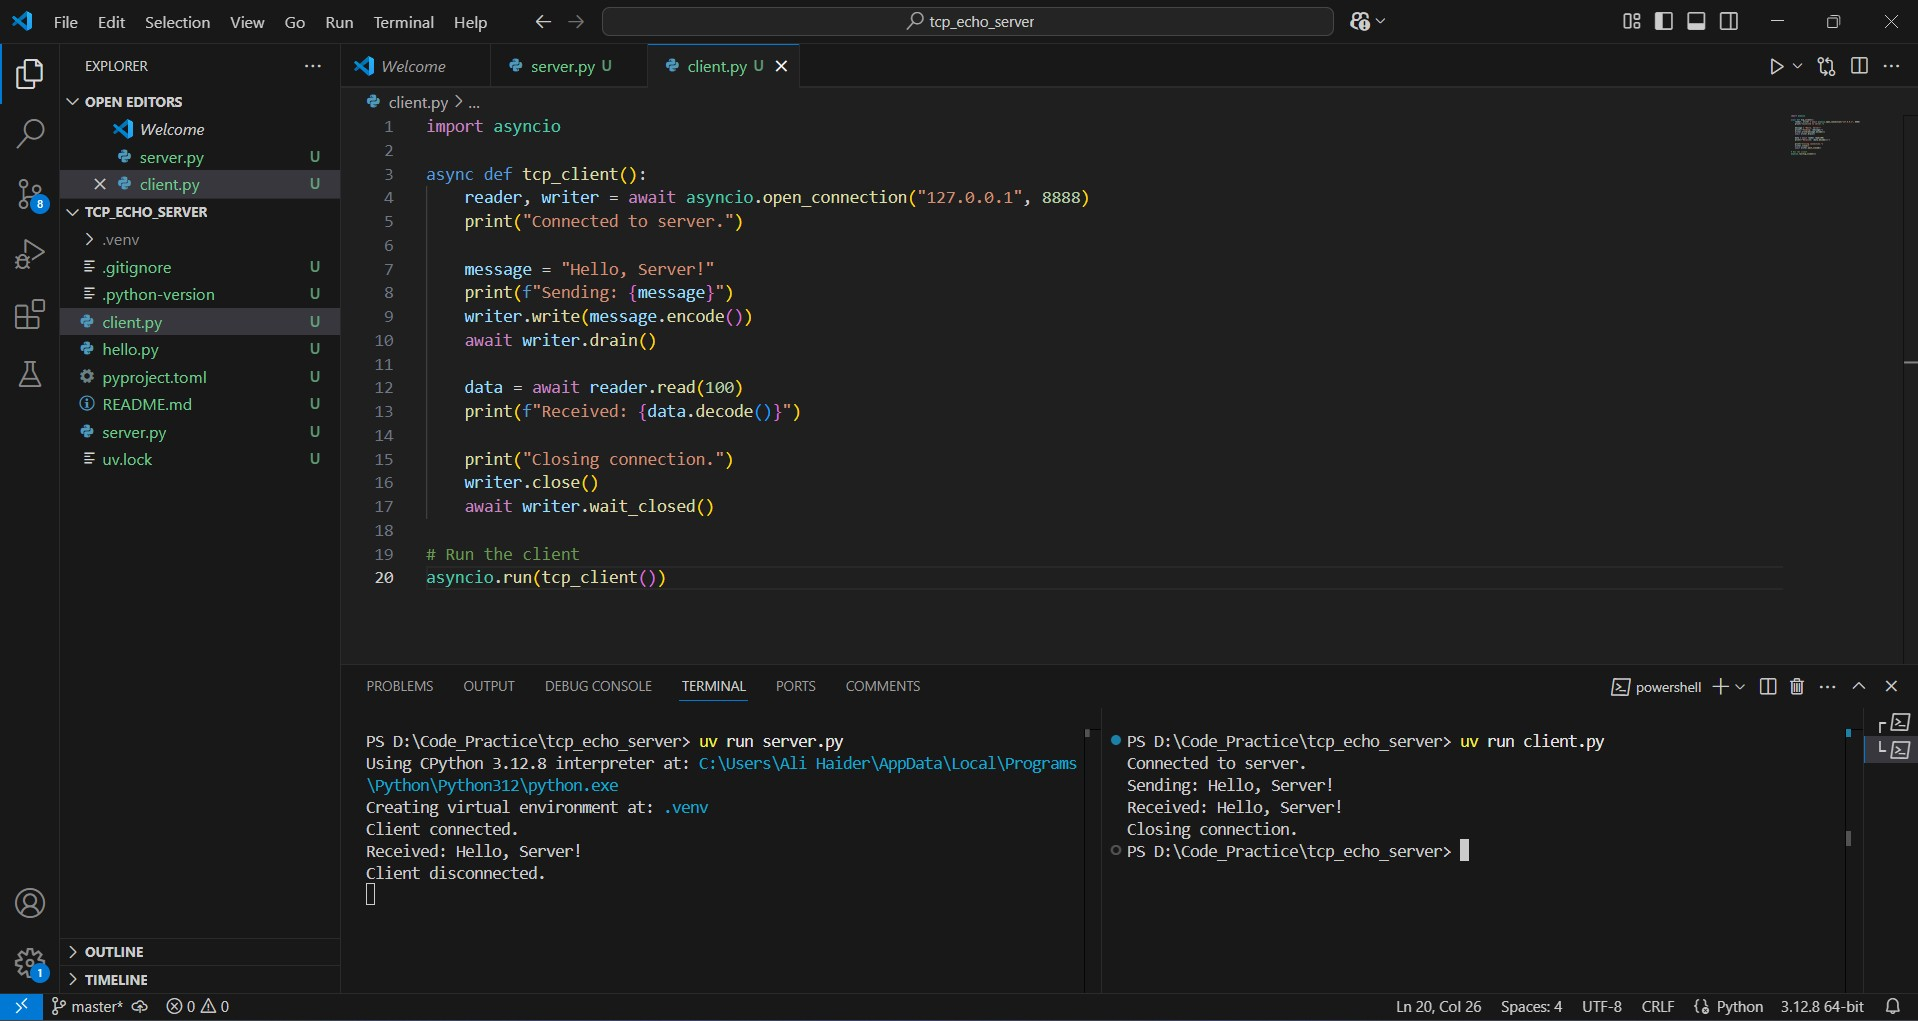

### **How It Works - server.py**

1.  **`asyncio.start_server`**:
    
    -   Creates a TCP server that listens on `127.0.0.1:8888`.
    -   Calls the `handle_client` coroutine for each incoming connection.
2.  **`handle_client`**:
    
    -   Accepts a `StreamReader` and `StreamWriter` for the client connection.
    -   Reads data from the client using `reader.read()`.
    -   Writes the data back to the client using `writer.write()`.
    -   Uses `await writer.drain()` to ensure the data is sent.
3.  **`asyncio.run(main())`**:
    
    -   Starts the event loop and runs the server.


### **How It Works - client.py**

1.  **`asyncio.open_connection`**:
    
    -   Connects to the server at `127.0.0.1:8888`.
    -   Returns a `StreamReader` and `StreamWriter` for the connection.
2.  **Sending Data**:
    
    -   Uses `writer.write()` to send data to the server.
    -   Calls `await writer.drain()` to ensure the data is sent.
3.  **Receiving Data**:
    
    -   Uses `reader.read()` to receive data from the server.
4.  **Closing the Connection**:
    
    -   Closes the writer using `writer.close()` and waits for the connection to close with `await writer.wait_closed()`.



---


### **Advanced Example: Streaming Data**

You can use `asyncio.Streams` to stream data in real-time. For example, streaming LLM responses or stock market data:

1.  New file 'streaming_server.py'
2.  copy -> paste below code

```python
# streaming_server.py

import asyncio

async def stream_data(writer):
    for i in range(5):
        message = f"Data chunk {i}\n"
        print(f"Sending: {message.strip()}")
        writer.write(message.encode())
        await writer.drain()
        await asyncio.sleep(1)  # Simulate delay between chunks
    writer.close()
    await writer.wait_closed()

async def handle_client(reader, writer):
    print("Client connected.")
    await stream_data(writer)
    print("Client disconnected.")

async def main():
    server = await asyncio.start_server(handle_client, "127.0.0.1", 8888)
    async with server:
        await server.serve_forever()

# Run the server
asyncio.run(main())

```

3.  uv run streaming_server.py


---


In this example:

-   The server streams data chunks to the client every second.
-   The client can process the data in real-time as it arrives.

### **Key Methods**

1.  **`StreamReader`**:
    
    -   `read(n)`: Read up to `n` bytes.
    -   `readline()`: Read a line of data.
    -   `readexactly(n)`: Read exactly `n` bytes.
    -   `readuntil(separator)`: Read until a specific separator is found.
2.  **`StreamWriter`**:
    
    -   `write(data)`: Write data to the stream.
    -   `drain()`: Wait until the data is sent.
    -   `close()`: Close the writer.
    -   `wait_closed()`: Wait until the connection is closed.

## **Client Code for Streaming Data Server**

Here’s the **client** for the **Advanced Example: Streaming Data** provided earlier. The client connects to the server and processes the streamed data in real-time.

```python
# streaming_client.py

import asyncio

async def handle_stream(reader):
    print("Connected to server. Streaming data...")
    while True:
        data = await reader.readline()  # Read a line of data
        if not data:
            break
        print(f"Received: {data.decode().strip()}")

async def tcp_client():
    reader, writer = await asyncio.open_connection("127.0.0.1", 8888)
    try:
        await handle_stream(reader)
    finally:
        print("Closing connection.")
        writer.close()
        await writer.wait_closed()

# Run the client
asyncio.run(tcp_client())
```

4.  uv run streaming_client.py



---


### **How to Run**

1.  Start the **server** (from the Advanced Example).
2.  Run the **client** in a separate terminal or script.

The client will connect to the server and display the streamed data in real-time.

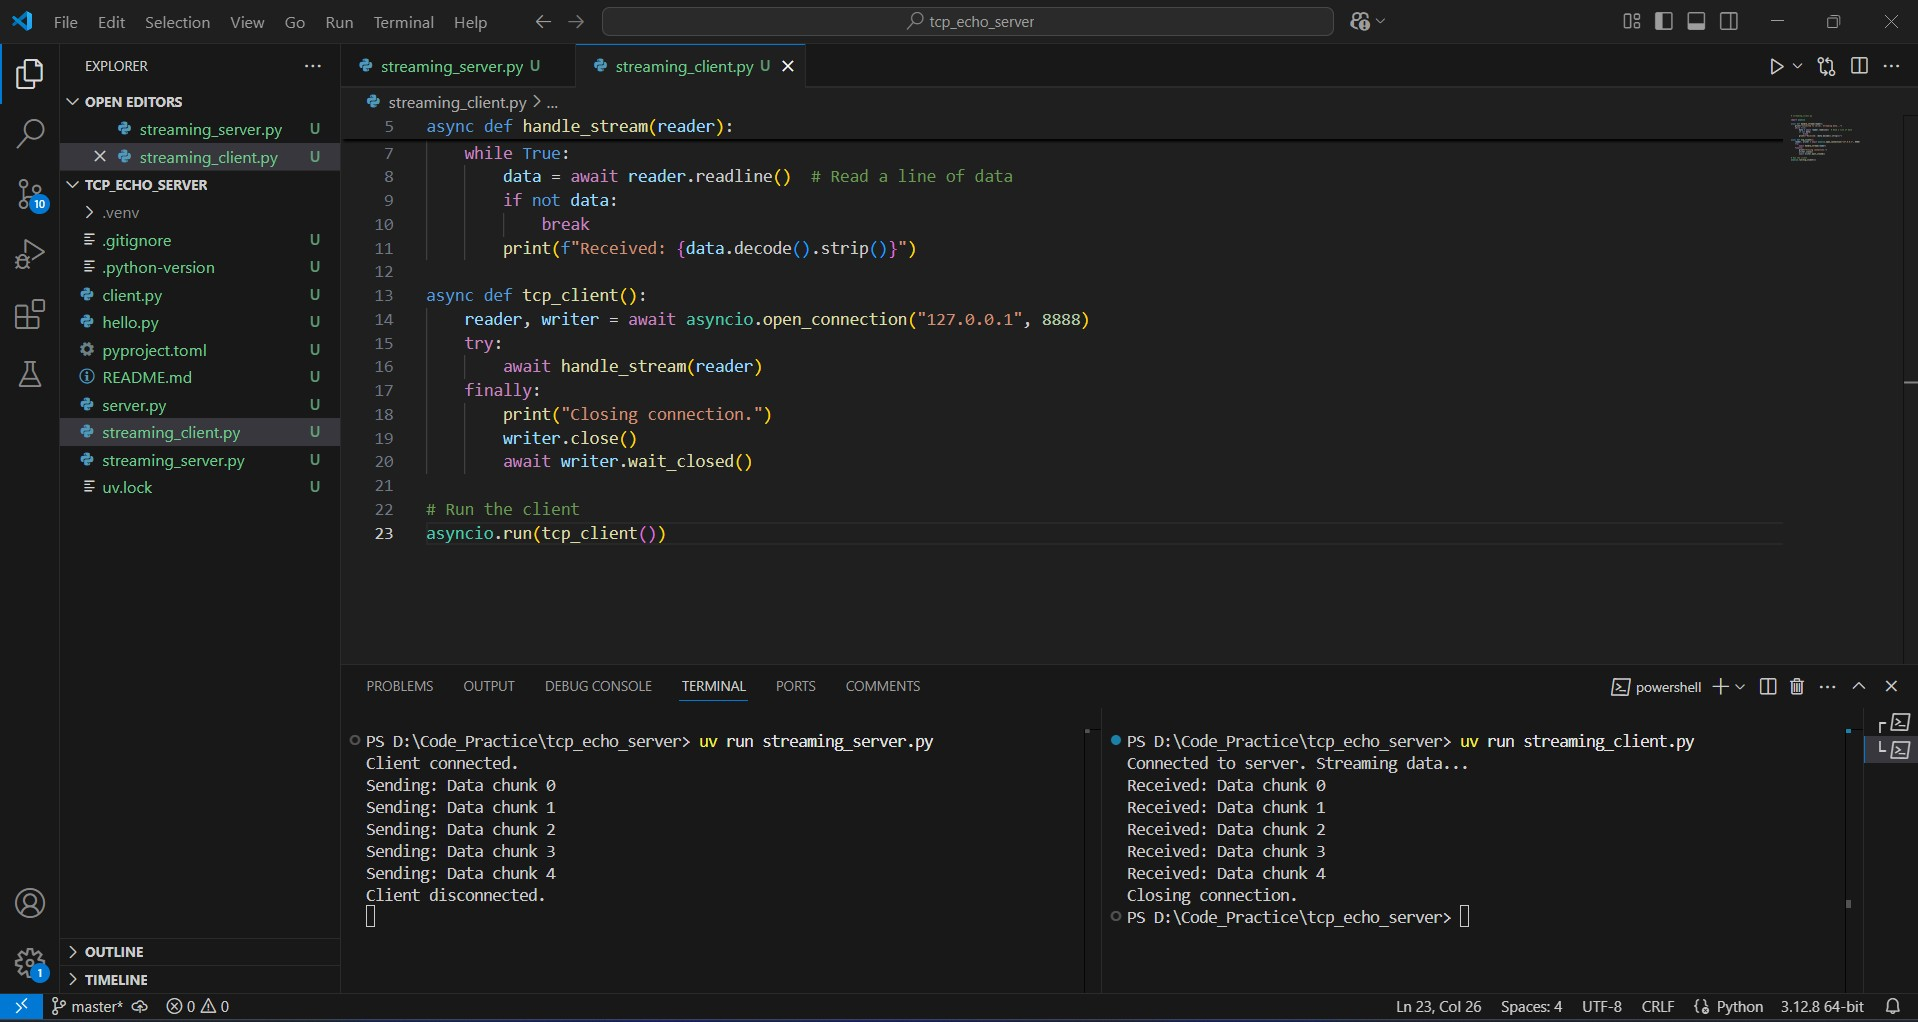



---


### **How It Works**

1.  **`asyncio.open_connection`**:
    
    -   Connects to the server at `127.0.0.1:8888`.
    -   Returns a `StreamReader` and `StreamWriter` for the connection.
2.  **`handle_stream`**:
    
    -   Reads data from the server line by line using `reader.readline()`.
    -   Processes the data in real-time as it arrives.
    -   Stops when the server closes the connection (i.e., `data` is empty).
3.  **Closing the Connection**:
    
    -   Ensures the connection is properly closed using `writer.close()` and `await writer.wait_closed()`.


### **Explanation of Key Components**

1.  **`reader.readline()`**:
    
    -   Reads a line of data from the stream.
    -   Useful for text-based protocols where data is delimited by newlines.
2.  **`writer.close()`**:
    
    -   Closes the writer to signal the end of the connection.
3.  **`await writer.wait_closed()`**:
    
    -   Waits for the connection to be fully closed.

----------

### **Customization**

-   **Binary Data**: If the server streams binary data, use `reader.read(n)` instead of `reader.readline()`.
-   **Error Handling**: Add error handling (e.g., `try/except`) to manage connection issues or unexpected data.
-   **Multiple Clients**: You can run multiple clients simultaneously to test how the server handles multiple connections.

----------

### **Summary**

This client connects to the streaming server, processes the data in real-time, and gracefully closes the connection. It demonstrates how to use `asyncio.StreamReader` and `asyncio.StreamWriter` for efficient, asynchronous communication.


## **2️⃣ `asyncio.Condition` – Coordinating Multi-Agent Tasks**

If an agent **depends on another agent’s work**, we can use `asyncio.Condition` to **signal when it’s ready**.

💡 **Example: A Shopping Agent Waiting for Payment Processing

In [ ]:
import asyncio

condition = asyncio.Condition()
payment_done = False  # Shared state

async def payment_processor():
    global payment_done
    await asyncio.sleep(5)  # Simulating payment process
    async with condition:
        payment_done = True
        print("✅ Payment processed! Notifying shopping agent...")
        condition.notify_all()

async def shopping_agent():
    async with condition:
        await condition.wait_for(lambda: payment_done)  # Wait for signal
        print("🛒 Order confirmed! Shipping in progress...")

async def main():
    await asyncio.gather(payment_processor(), shopping_agent())

#asyncio.run(main())
await main()


✅ Payment processed! Notifying shopping agent...
🛒 Order confirmed! Shipping in progress...



✅ **Best for:** Multi-agent workflows where **one agent depends on another**.**

## **3️⃣ `asyncio.TimeoutError` – Handling Slow API Calls**

Some APIs **take too long** to respond. `asyncio.wait_for()` ensures that **agents don’t get stuck waiting forever**.

💡 **Example: Agent Handling Slow API Response**

In [ ]:
import asyncio

async def slow_api_call():
    await asyncio.sleep(10)  # Simulating a slow response
    return "✅ API response received!"

async def agent_with_timeout():
    print("Calling api...")
    try:
        result = await asyncio.wait_for(slow_api_call(), timeout=7)
        print(result)
    except asyncio.TimeoutError:
        print("❌ Timeout! API took too long.")

#asyncio.run(agent_with_timeout())
await agent_with_timeout()


Calling api...
❌ Timeout! API took too long.


✅ **Best for:** Preventing agents from **getting stuck on slow APIs**.

## **4️⃣ `asyncio.PubSub` – Publish-Subscribe for Multi-Agent Messaging**

Many **Agentic AI systems** require **event-driven architectures** where agents **publish and subscribe** to messages dynamically.

💡 **Example: A Notification System for Agents**

In [ ]:
import asyncio

class PubSub:
    def __init__(self):
        self.subscribers = []

    async def subscribe(self, agent):
        self.subscribers.append(agent)

    async def publish(self, message):
        for agent in self.subscribers:
            asyncio.create_task(agent(message))  # Send message to each subscriber

async def agent_listener(message):
    print(f"🤖 Agent received: {message}")

async def main():
    pubsub = PubSub()

    # Agents subscribe to notifications
    await pubsub.subscribe(agent_listener)

    # Send messages asynchronously
    await pubsub.publish("🚀 New product available!")
    await pubsub.publish("🔥 Flash sale started!")

    await asyncio.sleep(1)  # Give time for messages to be processed

#asyncio.run(main())
await main()


🤖 Agent received: 🚀 New product available!
🤖 Agent received: 🔥 Flash sale started!


✅ **Best for:** Real-time messaging between **AI agents**, microservices, or notification systems.

## **5️⃣ `asyncio.BoundedSemaphore` – Managing Rate-Limited APIs**

Some external APIs **limit requests per second**. `asyncio.BoundedSemaphore` ensures **we don’t exceed the limit**.

💡 **Example: Handling Rate-Limited API Requests**

In [ ]:
import asyncio

semaphore = asyncio.BoundedSemaphore(2)  # Max 2 requests at a time

async def call_api(agent_id):
    async with semaphore:
        print(f"🤖 Agent {agent_id} making API call...")
        await asyncio.sleep(4)  # Simulating request time
        print(f"✅ Agent {agent_id} got API response!")

async def main():
    tasks = [call_api(i) for i in range(5)]
    await asyncio.gather(*tasks)

#asyncio.run(main())
await main()


🤖 Agent 0 making API call...
🤖 Agent 1 making API call...
✅ Agent 0 got API response!
✅ Agent 1 got API response!
🤖 Agent 2 making API call...
🤖 Agent 3 making API call...
✅ Agent 2 got API response!
✅ Agent 3 got API response!
🤖 Agent 4 making API call...
✅ Agent 4 got API response!


✅ **Best for:** Handling **LLM API rate limits** (like OpenAI API) efficiently.

## **6️⃣ `asyncio.CancelledError` – Gracefully Stopping Agent Tasks**

Sometimes, an **agent needs to stop a running task** (e.g., user cancels a search request).

💡 **Example: Cancelling a Running Agent Task**

In [ ]:
import asyncio

async def long_running_task():
    try:
        for i in range(10):
            print(f"Processing {i}...")
            await asyncio.sleep(1)
    except asyncio.CancelledError:
        print("⚠️ Task was cancelled!")
        raise

async def main():
    task = asyncio.create_task(long_running_task())

    await asyncio.sleep(3)  # Let it run for 3 seconds
    task.cancel()  # Cancel the task

    try:
        await task
    except asyncio.CancelledError:
        print("✅ Task cancelled successfully!")

#asyncio.run(main())
await main()


Processing 0...
Processing 1...
Processing 2...
⚠️ Task was cancelled!
✅ Task cancelled successfully!


✅ **Best for:** Canceling **long-running AI processes** when needed.


## **7️⃣ `asyncio.Recursive Tasks` – Multi-Level Agentic Workflows**

Sometimes, AI agents need to **trigger recursive workflows**, like **multi-step planning** or **web crawling**.

💡 **Example: Recursively Searching for Products**

In [ ]:
import asyncio

async def recursive_search(query, depth=1, max_depth=3):
    print(f"🔍 Searching for: {query} (Depth {depth})")

    if depth >= max_depth:
        return  # Stop recursion

    await asyncio.sleep(1)  # Simulate API delay
    await recursive_search(query + " (Refined)", depth + 1, max_depth)

#asyncio.run(recursive_search("Laptop"))
await recursive_search("Laptop")


🔍 Searching for: Laptop (Depth 1)
🔍 Searching for: Laptop (Refined) (Depth 2)
🔍 Searching for: Laptop (Refined) (Refined) (Depth 3)


✅ **Best for:** **Recursive AI workflows**, web crawlers, multi-step AI tasks.

# 🔍  – **More `asyncio` Features for Agentic AI**

| Feature                  | Best For                   | Example Use Case                    |   |
|--------------------------|----------------------------|-------------------------------------|---|
| asyncio.Streams          | Streaming data             | Real-time LLM response              |   |
| asyncio.Condition        | Agent coordination         | One agent waits for another         |   |
| asyncio.TimeoutError     | Handling slow APIs         | Auto-retries if API is slow         |   |
| asyncio.PubSub           | Inter-agent messaging      | AI agents share updates dynamically |   |
| asyncio.BoundedSemaphore | Rate limiting              | Preventing API overload             |   |
| asyncio.CancelledError   | Stopping agent tasks       | User cancels request                |   |
| Recursive Tasks          | Multi-step agent workflows | Recursive product search            |   |

### **🚀 Final Thoughts – Async is a Game-Changer for Agentic AI**

🔹 Speeds up agent workflows (**parallel execution**)  
🔹 Improves **user experience** (**real-time responses**)  
🔹 Prevents **bottlenecks & blocking calls**  
🔹 Enhances **scalability** (**handles multiple agents efficiently**)

### **1️⃣ Async API Calls with `aiohttp` – Speed Up LLM/VectorDB Requests**

When AI agents **interact with APIs** (e.g., OpenAI, DeepSeek, Weaviate, Pinecone), using `aiohttp` instead of `requests` **significantly boosts speed**.

💡 **Example: Making Fast Async Requests to OpenAI API** **bold text**

In [ ]:
!pip install -q aiohttp google-generativeai

In [ ]:
import aiohttp
import asyncio
import os
from google.colab import userdata

API_KEY = userdata.get('GEMINI_API_KEY') #os.getenv("GOOGLE_API_KEY")
GEMINI_URL = "https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash:generateContent"

HEADERS = {
    "Content-Type": "application/json",
}

async def fetch_gemini_response(prompt):
    """Asynchronously queries Gemini 2.0 API and returns a response."""
    params = {"key": API_KEY}
    payload = {"contents": [{"parts": [{"text": prompt}]}]}

    async with aiohttp.ClientSession() as session:
        async with session.post(GEMINI_URL, headers=HEADERS, json=payload, params=params) as response:
            data = await response.json()
            #print("data = ", data)
            return data["candidates"][0]["content"]["parts"][0]["text"]

async def main():
    prompts = [
        "What is Agentic AI? max 100 words",
        "Explain asyncio in Python. max 100 words",
        "How does Gemini 2.0 handle multimodal inputs? max 100 words"
    ]

    # Send multiple requests concurrently
    tasks = [fetch_gemini_response(p) for p in prompts]
    responses = await asyncio.gather(*tasks)

    for i, response in enumerate(responses):
        print(f"📝 Prompt {i+1}: {prompts[i]}\n🤖 Response: {response}\n")

# Run async function
#asyncio.run(main())
await main()


📝 Prompt 1: What is Agentic AI? max 100 words
🤖 Response: Agentic AI refers to artificial intelligence systems that can autonomously pursue goals and act in the world without constant human intervention.  Unlike reactive AI which only responds to immediate inputs, agentic AI exhibits proactiveness, planning, and the ability to adapt its behavior to achieve its objectives.  This involves capabilities like goal setting, decision-making, and learning from experience.  The development of truly agentic AI raises significant ethical and safety concerns.


📝 Prompt 2: Explain asyncio in Python. max 100 words
🤖 Response: Asyncio is Python's built-in library for writing concurrent code using the async/await syntax.  Instead of threads, it uses a single thread and an event loop to manage multiple asynchronous tasks concurrently.  This improves performance for I/O-bound operations (like network requests) by letting the program switch between tasks while waiting, avoiding blocking.  It's ideal for

### **Why Use `aiohttp`?**

🚀 **Sends multiple LLM requests in parallel**  
⏳ **Reduces total processing time significantly**  
⚡ **Ideal for AI agents, vector DB queries, and batch processing**

## **🔹 10 Reasons Why asyncio is a Game-Changer for Conversational UIs Like Chainlit 🚀**




----------

### **1. Non-Blocking Execution for Smooth User Experience**

-   **asyncio** ensures the UI remains **responsive** by handling tasks like API calls, LLM responses, and user inputs without blocking the main thread.
-   No more frozen screens or delays, even during long-running operations.

----------

### **2. Real-Time Streaming of Responses**

-   Conversational UIs often stream responses (e.g., token-by-token LLM output).
-   **asyncio** enables **real-time streaming**, updating the UI dynamically as data arrives.

----------

### **3. Scalability for High User Traffic**

-   **asyncio** handles **multiple users** concurrently without creating separate threads for each.
-   This makes the UI **scalable** and efficient, even under heavy load.

----------

### **4. Efficient Resource Utilization**

-   Unlike threading, **asyncio** uses a **single-threaded event loop**, reducing memory overhead and avoiding thread contention or deadlocks.
-   Perfect for managing many simultaneous interactions.

----------

### **5. Seamless Integration with Async APIs**

-   Modern APIs (e.g., OpenAI, Hugging Face, FastAPI) are built with **asyncio** in mind.
-   **asyncio** ensures smooth communication between the UI and these APIs.

----------

### **6. Clean and Maintainable Code**

-   **asyncio**’s `async` and `await` syntax simplifies writing **clean, readable, and maintainable code**.
-   Ideal for managing complex workflows in conversational UIs.

----------

### **7. Event-Driven Architecture**

-   Conversational UIs are **event-driven** (e.g., user inputs, button clicks, incoming messages).
-   **asyncio**’s **event loop** is tailor-made for handling such events efficiently.

----------

### **8. Support for Long-Running Tasks**

-   Tasks like **LLM inference** or **API calls** can take time.
-   **asyncio** runs these tasks in the background without blocking the UI, keeping the app interactive.

----------

### **9. Real-Time Notifications and Updates**

-   **asyncio** enables **instant notifications** (e.g., new messages, task completions) to be pushed to the UI.
-   Users get immediate feedback, enhancing their experience.

----------

### **10. Compatibility with Modern Frameworks**

-   Frameworks like **Chainlit**, **FastAPI**, and **LangChain** are built on **asyncio**.
-   Using **asyncio** ensures seamless compatibility and unlocks the full potential of these tools.

----------

### **Conclusion**

**asyncio** is the backbone of modern Conversational UIs like Chainlit. It delivers **non-blocking execution**, **real-time interactions**, and **scalability**, while ensuring efficient resource use and clean code. For building responsive, interactive, and high-performing conversational interfaces, **asyncio** is not just essential—it’s a game-changer.